# Podstawy Sztucznej Inteligencji 2018/2019



Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

# Klasyfikator minimalno-odległościowy

Notatnik ten zawiera implementacją klasyfikatora minimalno-odległościowego w numpy. Jest on podobny do omawianego na ćwiczeniach klasyfikatora kNN, jednak znacznie od niego prostszy.

**1\. Generacja danych.**

Tym razem, zamiast wczytywać dane, wygeneruj je z wykorzystaniem funkcji [make_blobs](http://scikit-learn.org/0.16/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs). 

Ustaw ilość próbek na `500`, a ilość grup (centrów) na `3`. Ponadto, aby twoje rysunki były analogiczne jak przedstawione poniżej, ważne jest ustawienie `random_state=2`.


In [25]:
%matplotlib inline
import numpy as np 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn.neighbors import NearestCentroid
import matplotlib.pyplot as plt

#metoda generujaca dane treningowe i testowe
from sklearn.datasets import make_blobs

blobs_data = None
blobs_target = None

# YOUR CODE HERE
blobs_data, blobs_target = make_blobs(n_samples=500, centers=3, random_state=2)



In [26]:
assert blobs_data.shape == (500, 2)
assert blobs_data.shape[0] == blobs_target.shape[0]

**Wizualizacja wygenerowanych danych**

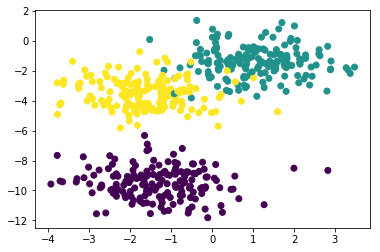

In [27]:
plt.scatter(blobs_data[:,0], blobs_data[:,1],c= np.ravel(blobs_target))

Powyższy wykres powinien wyglądać następująco:

![title](blobs.png)

**2\. Normalizacja danych wejściowych**

Przed rozpoczęciem należy zapewnić bezpośrednią porównywalność cech, czyli dokonać normalizacji. Skorzystaj ze wzoru z [Definicji 2](http://books.icse.us.edu.pl/runestone/static/ai/IstotaUczeniaNadzorowanegoINienadzorowanego/ReprezentacjaWzorcow.html#przetwarzanie-wstepne) 
 

 

In [28]:
def normalize(v):
    normalized = []
    for i in range(len(v[0])):
        mean = np.mean(v[:,i])
        std = np.std(v[:,i])
        normalized.append((v[:,i] - mean) / std )
    normalized = np.array(normalized).T
    return normalized

In [29]:
#TESTS
from sklearn.preprocessing import StandardScaler
from numpy.testing import assert_almost_equal

a = StandardScaler().fit_transform(blobs_data)
assert_almost_equal(a, normalize(blobs_data))

In [30]:
blobs_data_normalized = normalize(blobs_data)

np.testing.assert_array_almost_equal(blobs_data_normalized[100], np.array([0.39173587, 0.67031484]))

*Wykres po normalizacji*

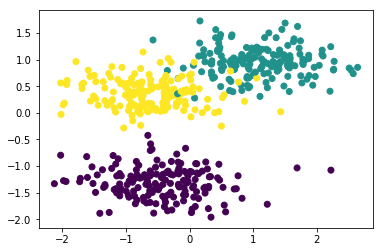

In [31]:
plt.scatter(blobs_data_normalized[:,0], blobs_data_normalized[:,1],c= np.ravel(blobs_target))

Powyższy wykres powinien wyglądać następująco:

![title](norm_blobs.png)

**3\. Podział na dane treningowe i testowe.**

W sposób losowy podziel wygenerowane dane na zriór uczący i testowy w proporcji 70% do 30%. Ustaw `random_state=123`

In [32]:
train, test, train_labels, test_labels = train_test_split(blobs_data_normalized, blobs_target, test_size=0.3, random_state=123)

In [33]:
assert np.shape(train)[0] == 0.7 * np.shape(blobs_data_normalized)[0]
assert np.shape(test)[0] == np.shape(blobs_data_normalized)[0] - np.shape(train)[0]

**4\. Wyznacz obiekt typowy dla każdej klasy, czyli prezentowana przez jeden typowy dla niej obiekt.**

W roli tego reprezentanta najczęściej występuje środek (średnia arytmetyczna) obiektów z danej klasy. 

In [37]:
def find_centroids(train_data, target_data):
    centroids = []
    for class_ in range(len(np.unique(target_data))):
        centroids.append([])
        for attrib in range(len(train_data[class_])):
            centroids[class_].append((np.mean(train_data[target_data == class_][:,attrib])))
    return np.array(centroids)

class_means = find_centroids(train, train_labels)
print(class_means)

[[-0.49010974 -1.31550465]
 [ 1.01046553  0.96259107]
 [-0.64904608  0.36325169]]


In [38]:
class_means[0,1]

-1.3155046512783313

In [39]:
assert class_means[0,1]==-1.3155046512783324

AssertionError: 

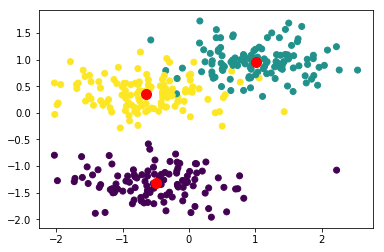

In [40]:
plt.scatter(train[:,0], train[:,1],c= np.ravel(train_labels))
plt.plot(class_means[0,0], class_means[0,1], 'ro',markersize=10)
plt.plot(class_means[1,0], class_means[1,1], 'ro',markersize=10)
plt.plot(class_means[2,0], class_means[2,1], 'ro',markersize=10)

Powyższy wykres powinien wyglądać następująco:
![title](means.png)

**5\. Odległość wektorów testowych od reprezentantów klas**

Dla każdej danej testowej, reprezentowanej przez wektor cech wyznacz odległość od reprezentantów klas


In [41]:
def distances(x):
    global class_means
    dis = []
    for i in range(len(x)):
        dis.append([])
        for k in range(len(class_means)):
            dis[i].append(np.sqrt((np.sum((x[i]-class_means[k])**2))))      
    return np.array(dis)

print(distances(test)[1,1])

1.788683457380568


In [42]:
assert distances(test).shape == (150,3)
assert distances(test)[1,1]==1.7886834573805668

AssertionError: 

**6\. Funkcja klasyfikująca**

Dla danych testowych wyznacza klasę, dla której obiekt ją reprezentujący jest najbliższy.

In [43]:
def classify(x):
    classes = []
    distance = distances(x)
    for i in range(len(x)):
        index = np.where(distance[i] == min(distance[i]))
        index  = np.array(index)[0][0]
        classes.append(index)
    return np.array(classes)

In [44]:
assert classify(test).shape == (150,)
assert classify(test)[100]==2

**7\. Jaki jest procent poprawych odpowiedzi?**

In [45]:
Z = classify(test)
score = np.sum(Z == test_labels)/ len(Z)

In [46]:
np.testing.assert_almost_equal(score, 0.9666666666666667)

**8\. Stwórz klasę `MinimumDistanceClassifier` analogiczną do klasy `NearestCentroid` z `sklearn`**

In [47]:
class MinimumDistanceClassifier():
    
    #wyznacza elementy reprezentatywne
    def fit(self, train, train_labels):
        self.centroids = []
        for k in range(len(np.unique(train_labels))):
            self.centroids.append([])
            for i in range(len(train[k])):
                self.centroids[k].append(np.mean(train[train_labels == k][:,i]))      
        return self
    
    #wyznacza klasę dla każdej danej testowej
    def predict(self, test):
        self.classes = []
        self.distance = distances(test)
        for i in range(len(test)):
            index = np.where(self.distance[i] == min(self.distance[i]))
            index  = np.array(index)[0][0]
            self.classes.append(index)
        return np.array(self.classes)
    
    #wyznacza dokładność klasyfikatora
    def score(self, test, test_labels):
        Z = self.predict(test)
        score = np.sum(Z == test_labels)/ len(Z)
        return score
        

In [48]:
clf = MinimumDistanceClassifier()
clf.fit(train, train_labels)
clf.score(test, test_labels)
np.testing.assert_almost_equal(score, clf.score(test, test_labels))

**9\. Porównanie z klasyfikatorem `NearestCentroid` z `sklearn`**

In [49]:
from sklearn.neighbors import NearestCentroid 

ncent = NearestCentroid()
ncent.fit(train, train_labels)
np.testing.assert_array_almost_equal(ncent.predict(test),  clf.predict(test))
assert ncent.score(test, test_labels) == clf.score(test, test_labels)


In [50]:
h = .02
x_min, x_max = train[:, 0].min() - 1, train[:, 0].max() + 1
y_min, y_max = train[:, 1].min() - 1, train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

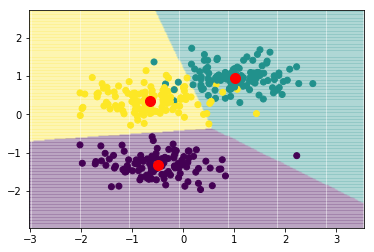

In [51]:
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, alpha=0.1)
plt.scatter(train[:,0], train[:,1],c= np.ravel(train_labels))
plt.plot(class_means[0,0], class_means[0,1], 'ro',markersize=10)
plt.plot(class_means[1,0], class_means[1,1], 'ro',markersize=10)
plt.plot(class_means[2,0], class_means[2,1], 'ro',markersize=10)